# Exercício Intermediário: Visualizando a Função de Custo na Regressão Linear

Neste exercício, você irá:
- Relembrar a equação da regressão linear:  
  $$ y = \\theta_0 + \\theta_1 x $$
  
- Compreender a função de custo (Erro Médio Quadrático - MSE):  
  $$ J(\\theta_0, \\theta_1) = \\frac{1}{2m} \\sum_{i=1}^{m} \\Big(\\theta_0 + \\theta_1 x^{(i)} - y^{(i)}\\Big)^2 $$

- Implementar uma função que calcula o custo para um par de parâmetros \\( \\theta_0 \\) e \\( \\theta_1 \\).
- Gerar uma "malha" de valores para \\( \\theta_0 \\) e \\( \\theta_1 \\) e calcular o custo para cada combinação.
- Visualizar o resultado com um gráfico de contorno (e, opcionalmente, um gráfico 3D).

**Instruções:**  
- Complete os pontos marcados com `???`.
- Siga os comentários para entender cada passo.
- Não se preocupe se a parte matemática parecer difícil; as fórmulas foram simplificadas para facilitar a compreensão.


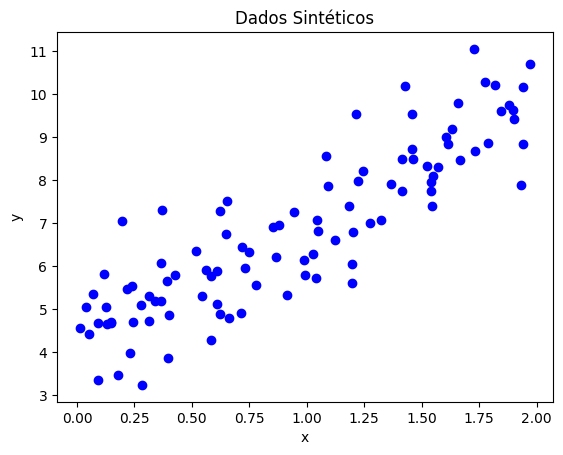

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Para o gráfico 3D (opcional)

# Configurar os gráficos para serem exibidos inline (Jupyter)
%matplotlib inline

# Gerar dados sintéticos para regressão linear simples
# Usaremos a equação: y = 4 + 3x + ruído
np.random.seed(42)  # Garante resultados reprodutíveis
m = 100  # Número de amostras

X = 2 * np.random.rand(m, 1)  # Valores de x no intervalo [0, 2)
y = 4 + 3 * X + np.random.randn(m, 1)  # Equação com ruído

# Visualize os dados
plt.scatter(X, y, color='blue', marker='o')
plt.title("Dados Sintéticos")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [5]:
def compute_cost(theta0, theta1, X, y):
    """
    Calcula o custo (MSE) para os parâmetros theta0 e theta1.
    
    Parâmetros:
      theta0: Valor do intercepto (θ₀)
      theta1: Valor do coeficiente (θ₁)
      X: Dados de entrada (array de shape (m, 1))
      y: Dados alvo (array de shape (m, 1))
      
    Retorna:
      Custo (valor escalar)
    """
    m = len(y)  # Número de amostras
    # Calcula as predições: h(x) = θ₀ + θ₁ * x
    predictions = theta0 + theta1 * X  # (m, 1)
    
    # Calcula o erro: predição - valor real
    errors = predictions - y  # (m, 1)
    
    # Calcula o custo: (1/(2m)) * soma dos erros ao quadrado
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    
    return cost

# Teste a função de custo com alguns valores
# Por exemplo, para theta0 = 4 e theta1 = 3 (valores "ideais" segundo nossa equação)
cost_value = compute_cost(4, 3, X, y)
print("Custo para theta0 = 4 e theta1 = 3:", cost_value)

# *Experimente:* Altere os valores de theta0 e theta1 para ver como o custo muda.


Custo para theta0 = 4 e theta1 = 3: 0.4125533899539692


In [6]:
# Defina os intervalos para theta0 e theta1
theta0_vals = np.linspace(2, 6, 50)  # Intervalo para theta0 (exemplo: de 2 a 6)
theta1_vals = np.linspace(1, 5, 50)  # Intervalo para theta1 (exemplo: de 1 a 5)

# Crie uma malha com todos os pares possíveis de theta0 e theta1
Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)

# Inicialize uma matriz para armazenar os custos
J_vals = np.zeros(Theta0.shape)

# Calcule o custo para cada combinação de theta0 e theta1 na malha
for i in range(Theta0.shape[0]):
    for j in range(Theta0.shape[1]):
        t0 = Theta0[i, j]
        t1 = Theta1[i, j]
        J_vals[i, j] = compute_cost(t0, t1, X, y)

# Visualize o formato de J_vals (deve ser uma matriz 50x50)
print("Formato da matriz de custo:", J_vals.shape)


Formato da matriz de custo: (50, 50)


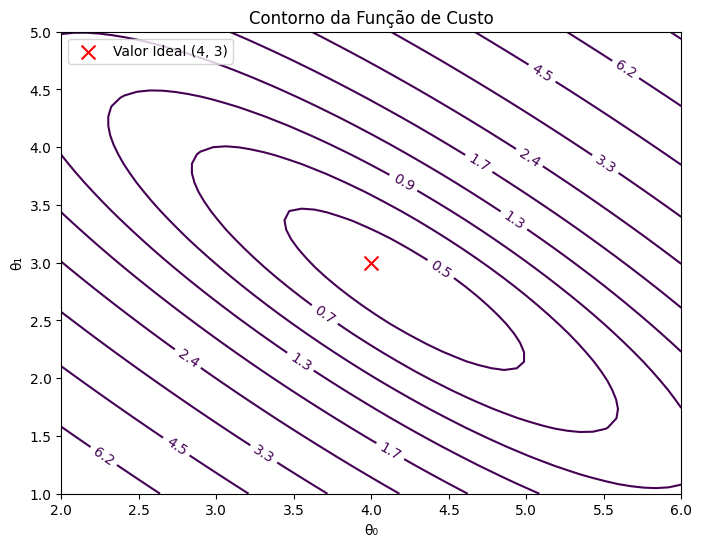

In [7]:
# Plot do gráfico de contorno
plt.figure(figsize=(8, 6))
CS = plt.contour(Theta0, Theta1, J_vals, levels=np.logspace(-1, 3, 30), cmap='viridis')
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contorno da Função de Custo")
plt.xlabel("θ₀")
plt.ylabel("θ₁")
plt.scatter(4, 3, color='red', marker='x', s=100, label='Valor Ideal (4, 3)')
plt.legend()
plt.show()

# *Dica:* Observe como o custo aumenta conforme você se afasta dos valores ideais.


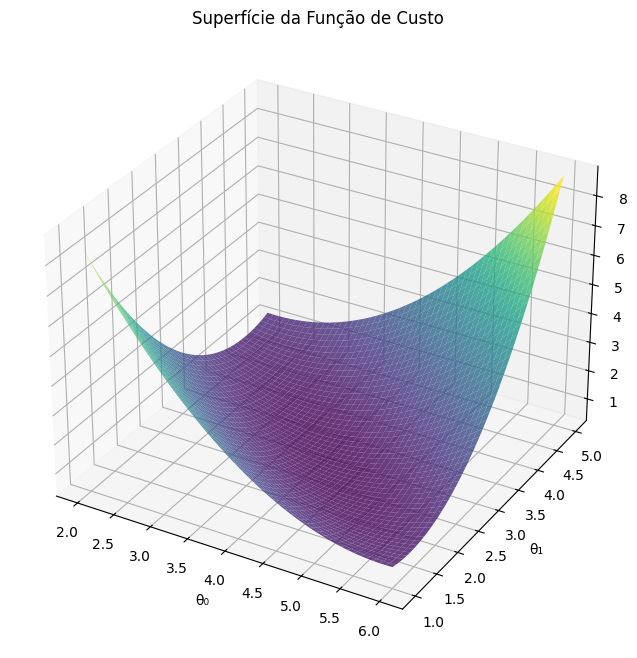

In [8]:
# (Opcional) Gráfico 3D para visualizar a função de custo
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta0, Theta1, J_vals, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_title("Superfície da Função de Custo")
ax.set_xlabel("θ₀")
ax.set_ylabel("θ₁")
ax.set_zlabel("Custo J")
plt.show()

## Conclusão

Neste exercício, você:
- Implementou a função de custo para a regressão linear simples.
- Gerou uma malha de valores para os parâmetros \\( \\theta_0 \\) e \\( \\theta_1 \\).
- Visualizou a função de custo utilizando gráficos de contorno e (opcionalmente) um gráfico 3D.

**Pontos para refletir:**
- Por que a função de custo é convexa?  
  (Dica: isso garante que há um único mínimo global.)
- Como a variação de \\( \\theta_0 \\) e \\( \\theta_1 \\) afeta o custo?
- Experimente alterar os intervalos de \\( \\theta_0 \\) e \\( \\theta_1 \\) e veja como a visualização muda.

Bom trabalho e continue explorando os conceitos!
